### Import some packages and data

In [1]:
import numpy as np
import cvxopt as cvx
import picos as pic
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import array
f = open('faces','r')
faces = np.load(f)
f.close()

### We generate a signal, and its noisy (corrupted) version

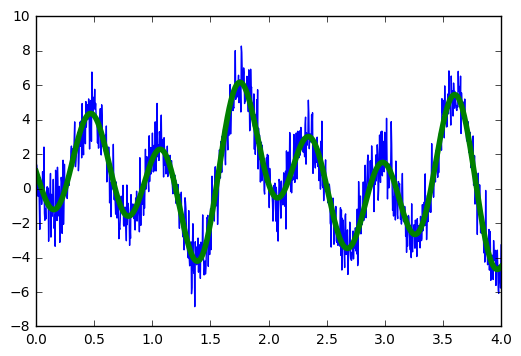

In [2]:
xxx = np.linspace(0,4,1000)
f = lambda x: np.sin(x)+2*np.sin(4*x)-3*np.sin(10*x)+np.cos(7*x)
fff = np.array([f(x) for x in xxx])
f_cor = np.array([f(x)+np.random.randn() for x in xxx])
plt.plot(xxx,f_cor)
plt.plot(xxx,fff,linewidth=4)

### Construct the smoothing matrix $D$

In [3]:
n = fff.shape[0]
D = cvx.matrix(0.,(n-1,n))
for i in range(n-1):
    #TODO set the elements of D

### Solve the quadratic smoothing problem

In [ ]:
P = pic.Problem()
ff_cor = pic.new_param('f_cor',f_cor)
ff_den = P.add_variable('f_den',n)
#TODO add more variables and constraints
# ... 
P.solve(verbose=False)

#now plot the denoised signal
plt.plot(xxx,fff,linewidth=2)
plt.plot(xxx,ff_den.value,linewidth=2,color='red')

### Now we do it for a signal with sharp transitions

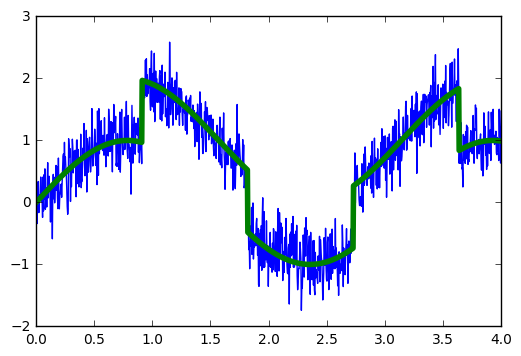

In [5]:
f = lambda x: np.sin(2*x)+(int(1.1*x) % 2)
fff = np.array([f(x) for x in xxx])
f_cor = np.array([f(x)+0.3*np.random.randn() for x in xxx])
plt.plot(xxx,f_cor)
plt.plot(xxx,fff,linewidth=4)


In [ ]:
#TODO copy and paste the code from the previous cell with problem P

### OK, but we sharp transitions have been smoothed, too.
#### Let's try we the L1-norm (minimize "total variation")

In [ ]:
#TODO paste the cell again, and modify the code
#to use the L1 norm in the regulizor

### OK, so a good idea is probably to minimize a combination of L1- and L2-norm

In [ ]:
#Now, try to use a combination of the 1-norm and the 2 norm.

# -------------------------------------------------------------------------------

### Now we try it we a 2d-signal (a picture)

### Choose an image (index between $i=0$ and $i=399$)

In [3]:
i = 160
image = 1-faces[i]
print image

[[ 0.56611574  0.53305781  0.47520661 ...,  0.70247936  0.70247936
   0.72727275]
 [ 0.59090912  0.54132235  0.4834711  ...,  0.73966944  0.69834709
   0.70247936]
 [ 0.60743803  0.53305781  0.48760331 ...,  0.71900827  0.71900827
   0.68181819]
 ..., 
 [ 0.6570248   0.51239669  0.4834711  ...,  0.83057851  0.82231402
   0.83057851]
 [ 0.57024795  0.50826442  0.49173552 ...,  0.82644629  0.82644629
   0.83057851]
 [ 0.54132235  0.51652896  0.49586779 ...,  0.82644629  0.83057851
   0.83057851]]


### So, the image is in fact an array of pixels, with intensity between 0 (white pixel ) and 1 (black pixel)
#### Let us now see what this image looks like...

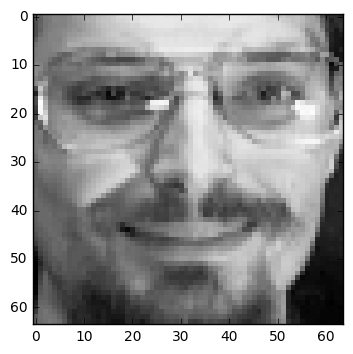

In [4]:
def show_image(img,ax=None,title=None):
    if ax is None:
        ax = plt.gca()
    ax.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    if title:
        ax.set_title(title)
show_image(image)

### Now, we add some noise to the image, and we display the noisy image

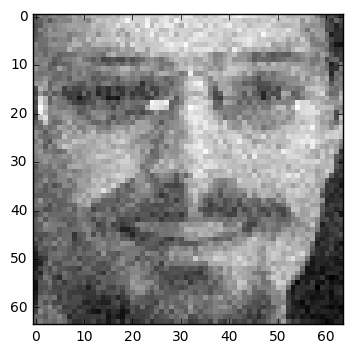

In [5]:
n,m = image.shape
noisy_image = np.array(image)
noisy_image = noisy_image + 0.05 * np.random.randn(n,m)
noisy_image = np.maximum(np.minimum(noisy_image,1.),0.)
show_image(noisy_image)

### Construct the smooting matrix $D$ from the regularizing term $\phi(X) = \lambda \Vert D\, X[:] \Vert$
In python, `X[:]` represents the vectorization of `X`:

if `X` is a $n \times m$ matrix, then `X[:]` is a vector of dimension $nm$, obtained by stacking vertically the $m$ columns of `X`.

In [ ]:
#We first store the rows of the matrix D in a list,
# and this list of rows is transformed into a matrix at the end of this cell.

D = []
#TODO ...
for i in range(...):
    for j in range(...):
        v = [0]*n*m
        ...
        D.append(v)

D = cvx.matrix(D).T

### Construct the optimization problem, as a function of the multipliers $\lambda_1$ and $\lambda_2$

In [ ]:
import picos as pic

#TODO adapt the code from above to smooth an image 'Xnoisy',
#and put it in a function that depends on the 2 multipliers
def smooth_image(lbda1,lbda2):
    P = pic.Problem()
    X_noisy = pic.new_param('Xnoisy',noisy_image)
    X = P.add_variable('X',(n,m))
    #add more variables and constraints
    #...
    
    P.solve(verbose=False)
    return X.value

### Show the denoised face

In [ ]:
fig=plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(131)
show_image(noisy_image,ax1)
ax2 = fig.add_subplot(132)
show_image(image,ax2)
ax3 = fig.add_subplot(133)
show_image(smooth_image(0.004,0.4),ax3)

### Show result for several values of the multipliers

In [ ]:
lb1 = [0.,0.003,0.006,0.009,0.012,0.015]
lb2 = [0.,0.4,0.8,1.2,1.6]

n1,n2 = len(lb1),len(lb2)
fig, axarr = plt.subplots(n2,n1,figsize=(20,17))

for i,l1 in enumerate(lb1):
    for j,l2 in enumerate(lb2):
        show_image(smooth_image(l1,l2),axarr[j,i],str((l1,l2)))